In [2]:
# Imports

import os
import json
import tqdm
import yaml

import torch
import numpy as np
import matplotlib.pyplot as plt

from omegaconf import OmegaConf
from pathlib import Path
from tqdm.auto import tqdm

/home/denis/miniconda3/envs/dal-toolbox/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%%bash
fusermount -uz /mnt/work/deep_al/
sshfs cluster.ies:/mnt/work/deep_al/ /mnt/work/deep_al/

In [4]:

def load_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_results(path):
    path = Path(path)
    assert path.is_dir(), 'Path does not exist.'
    exp_json = path / 'results.json'
    results = load_json(exp_json)
    return results

def load_args(path):
    path = Path(path)
    assert path.is_dir(), 'Path does not exist.'
    exp_cfg = path / '.hydra' / 'config.yaml'
    cfg =  OmegaConf.load(exp_cfg)
    return cfg

def load_checkpoint(path, final=True):
    path = Path(path)
    assert path.is_dir(), 'Path does not exist.'
    if final:
        exp_pth = path / 'model_final.pth'
    else:
        exp_pth = path / 'checkpoint.pth'
    checkpoint = torch.load(exp_pth)
    return checkpoint

def get_experiments(result_path, glob_pattern, train_results=False):
    # Aggregate results over multiple glob pattern such as seeds
    experiments = []
    for exp_path in result_path.glob(glob_pattern):
        d = load_results(exp_path)
        experiments.append(d)
    assert len(experiments) != 0, f'No experiments found for {result_path}.'
    return experiments

path = f'/mnt/work/deep_al/results/hyperparameters/experiments/CIFAR10/random/lr0.001_wd0.0005/'
exp_results = get_experiments(Path(path), 'seed1')
# metrics = get_metric_values(exp_results)
print(exp_results[0].keys())
# print(len(exp_results[0]['results']['train_history']))
# print(exp_results[0]['results']['test_stats'].keys())

dict_keys(['cycle0', 'cycle1', 'cycle2', 'cycle3', 'cycle4', 'cycle5', 'cycle6', 'cycle7', 'cycle8', 'cycle9', 'cycle10', 'cycle11', 'cycle12', 'cycle13', 'cycle14', 'cycle15', 'cycle16', 'cycle17', 'cycle18', 'cycle19', 'cycle20', 'cycle21', 'cycle22', 'cycle23', 'cycle24', 'cycle25', 'cycle26', 'cycle27', 'cycle28', 'cycle29', 'cycle30', 'cycle31', 'cycle32', 'cycle33', 'cycle34', 'cycle35', 'cycle36', 'cycle37', 'cycle38', 'cycle39'])


## Random

In [4]:

root_path = Path('/mnt/work/deep_al/results/hyperparameters/experiments/CIFAR10')
experiments = {
    'lr=0.001 wd=0.0005': root_path / 'random' / 'lr0.001_wd0.0005',
    'lr=0.001 wd=0.005': root_path / 'random' / 'lr0.001_wd0.005',
    'lr=0.001 wd=0.05': root_path / 'random' / 'lr0.001_wd0.05',
    'lr=0.01 wd=0.0005': root_path / 'random' / 'lr0.01_wd0.0005',
    'lr=0.01 wd=0.005': root_path / 'random' / 'lr0.01_wd0.005',
    'lr=0.01 wd=0.05': root_path / 'random' / 'lr0.01_wd0.05',
    'lr=0.1 wd=0.0005': root_path / 'random' / 'lr0.1_wd0.0005',
    'lr=0.1 wd=0.005': root_path / 'random' / 'lr0.1_wd0.005',
    # 'lr=0.1 wd=0.05': root_path / 'random' / 'lr0.1_wd0.05',
}

all_results = {}
for exp_name, exp_path in tqdm(experiments.items()):
    all_results[exp_name] = get_experiments(Path(exp_path), 'seed*')


100%|██████████| 8/8 [00:35<00:00,  4.45s/it]


In [5]:
learning_curves_random = {}

for exp_name in experiments:
    accuracies = []
    for seed_results in all_results[exp_name]:
        seed_accuracies = []
        for cycle in seed_results:
            seed_accuracies.append(seed_results[cycle]['test_stats']['accuracy'])
        accuracies.append(seed_accuracies)
    learning_curves_random[exp_name] = {'acc_mean': np.mean(accuracies, axis=0), 'acc_std': np.std(accuracies, axis=0)}

## Entropy

In [9]:

root_path = Path('/mnt/work/deep_al/results/hyperparameters/experiments/CIFAR10')
experiments = {
    'lr=0.001 wd=0.0005': root_path / 'entropy' / 'lr0.001_wd0.0005',
    'lr=0.001 wd=0.005': root_path / 'entropy' / 'lr0.001_wd0.005',
    'lr=0.001 wd=0.05': root_path / 'entropy' / 'lr0.001_wd0.05',
    'lr=0.01 wd=0.0005': root_path / 'entropy' / 'lr0.01_wd0.0005',
    'lr=0.01 wd=0.005': root_path / 'entropy' / 'lr0.01_wd0.005',
    'lr=0.01 wd=0.05': root_path / 'entropy' / 'lr0.01_wd0.05',
    'lr=0.1 wd=0.0005': root_path / 'entropy' / 'lr0.1_wd0.0005',
    'lr=0.1 wd=0.005': root_path / 'entropy' / 'lr0.1_wd0.005',
    # 'lr=0.1 wd=0.05': root_path / 'entropy' / 'lr0.1_wd0.05',
}

all_results = {}
for exp_name, exp_path in tqdm(experiments.items()):
    all_results[exp_name] = get_experiments(Path(exp_path), 'seed*')


100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


In [10]:
learning_curves_entropy = {}

for exp_name in experiments:
    accuracies = []
    for seed_results in all_results[exp_name]:
        seed_accuracies = []
        for cycle in seed_results:
            seed_accuracies.append(seed_results[cycle]['test_stats']['accuracy'])
        accuracies.append(seed_accuracies)
    learning_curves_entropy[exp_name] = {'acc_mean': np.mean(accuracies, axis=0), 'acc_std': np.std(accuracies, axis=0)}

## Corset

In [11]:

root_path = Path('/mnt/work/deep_al/results/hyperparameters/experiments/CIFAR10')
experiments = {
    'lr=0.001 wd=0.0005': root_path / 'coreset' / 'lr0.001_wd0.0005',
    'lr=0.001 wd=0.005': root_path / 'coreset' / 'lr0.001_wd0.005',
    'lr=0.001 wd=0.05': root_path / 'coreset' / 'lr0.001_wd0.05',
    'lr=0.01 wd=0.0005': root_path / 'coreset' / 'lr0.01_wd0.0005',
    'lr=0.01 wd=0.005': root_path / 'coreset' / 'lr0.01_wd0.005',
    'lr=0.01 wd=0.05': root_path / 'coreset' / 'lr0.01_wd0.05',
    'lr=0.1 wd=0.0005': root_path / 'coreset' / 'lr0.1_wd0.0005',
    'lr=0.1 wd=0.005': root_path / 'coreset' / 'lr0.1_wd0.005',
    # 'lr=0.1 wd=0.05': root_path / 'coreset' / 'lr0.1_wd0.05',
}

all_results = {}
for exp_name, exp_path in tqdm(experiments.items()):
    all_results[exp_name] = get_experiments(Path(exp_path), 'seed*')


100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


In [12]:
learning_curves_coreset = {}

for exp_name in experiments:
    accuracies = []
    for seed_results in all_results[exp_name]:
        seed_accuracies = []
        for cycle in seed_results:
            seed_accuracies.append(seed_results[cycle]['test_stats']['accuracy'])
        accuracies.append(seed_accuracies)
    learning_curves_coreset[exp_name] = {'acc_mean': np.mean(accuracies, axis=0), 'acc_std': np.std(accuracies, axis=0)}

## Badge

In [13]:
experiments = {
    'lr=0.001 wd=0.0005': root_path / 'badge' / 'lr0.001_wd0.0005',
    'lr=0.001 wd=0.005': root_path / 'badge' / 'lr0.001_wd0.005',
    'lr=0.001 wd=0.05': root_path / 'badge' / 'lr0.001_wd0.05',
    'lr=0.01 wd=0.0005': root_path / 'badge' / 'lr0.01_wd0.0005',
    'lr=0.01 wd=0.005': root_path / 'badge' / 'lr0.01_wd0.005',
    'lr=0.01 wd=0.05': root_path / 'badge' / 'lr0.01_wd0.05',
    'lr=0.1 wd=0.0005': root_path / 'badge' / 'lr0.1_wd0.0005',
    'lr=0.1 wd=0.005': root_path / 'badge' / 'lr0.1_wd0.005',
    # 'lr=0.1 wd=0.05': root_path / 'badge' / 'lr0.1_wd0.05',
}

all_results = {}
for exp_name, exp_path in tqdm(experiments.items()):
    all_results[exp_name] = get_experiments(Path(exp_path), 'seed*')


100%|██████████| 8/8 [00:09<00:00,  1.25s/it]


In [14]:
learning_curves_badge = {}

for exp_name in experiments:
    accuracies = []
    for seed_results in all_results[exp_name]:
        seed_accuracies = []
        for cycle in seed_results:
            seed_accuracies.append(seed_results[cycle]['test_stats']['accuracy'])
        accuracies.append(seed_accuracies)
    learning_curves_badge[exp_name] = {'acc_mean': np.mean(accuracies, axis=0), 'acc_std': np.std(accuracies, axis=0)}

## Learning Curves

<Figure size 1000x500 with 0 Axes>

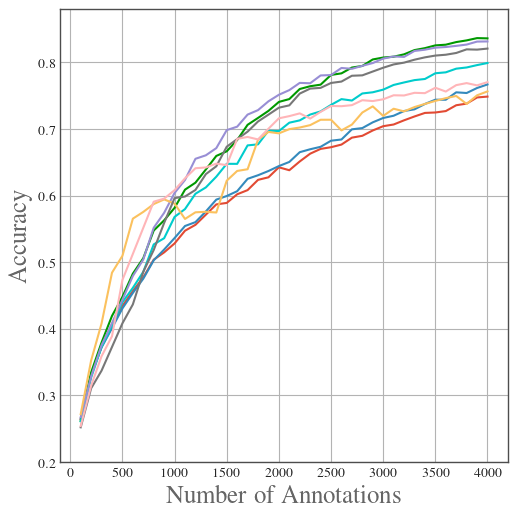

<Figure size 1000x500 with 0 Axes>

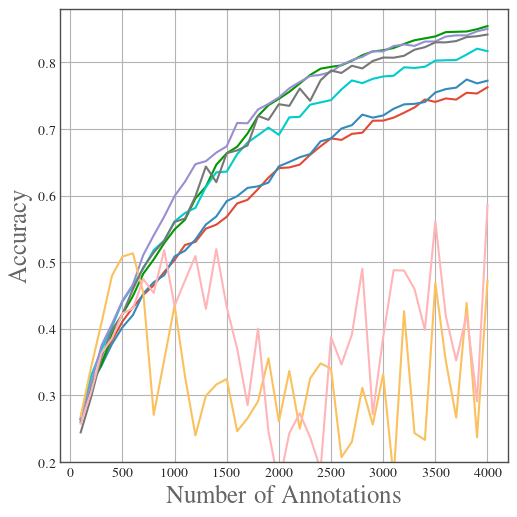

<Figure size 1000x500 with 0 Axes>

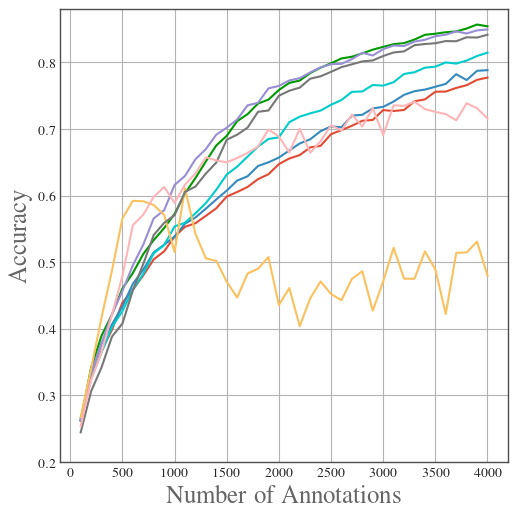

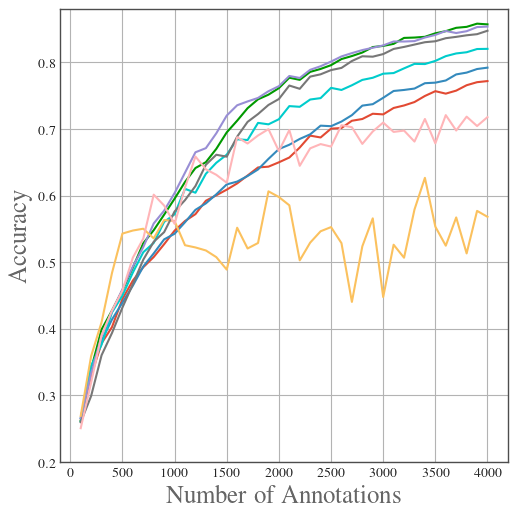

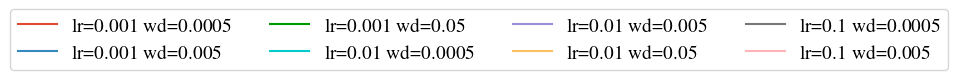

In [17]:
fontdict = dict(fontsize=18)
ylim = (0.2, 0.88)
fig = plt.figure()
plt.figure(figsize=(5, 5))
for name, curve_dict in learning_curves_random.items():
    curve = curve_dict['acc_mean']
    plt.plot(np.arange(100, 100*len(curve)+1, 100), curve, label=name)
plt.tight_layout()
plt.ylim(ylim)
plt.xlabel('Number of Annotations', fontdict=fontdict)
plt.ylabel('Accuracy', fontdict=fontdict)
plt.savefig('plots/graphical_abstract_random.pdf', bbox_inches='tight', pad_inches=0) 
plt.show()

ylim = (0.2, 0.88)
fig = plt.figure()
plt.figure(figsize=(5, 5))
for name, curve_dict in learning_curves_entropy.items():
    curve = curve_dict['acc_mean']
    plt.plot(np.arange(100, 100*len(curve)+1, 100), curve, label=name)
plt.tight_layout()
plt.ylim(ylim)
plt.xlabel('Number of Annotations', fontdict=fontdict)
plt.ylabel('Accuracy', fontdict=fontdict)
plt.savefig('plots/graphical_abstract_entropy.pdf', bbox_inches='tight', pad_inches=0) 
plt.show()

ylim = (0.2, 0.88)
fig = plt.figure()
plt.figure(figsize=(5, 5))
for name, curve_dict in learning_curves_coreset.items():
    curve = curve_dict['acc_mean']
    plt.plot(np.arange(100, 100*len(curve)+1, 100), curve, label=name)
plt.tight_layout()
plt.ylim(ylim)
plt.xlabel('Number of Annotations', fontdict=fontdict)
plt.ylabel('Accuracy', fontdict=fontdict)
plt.savefig('plots/graphical_abstract_coreset.pdf', bbox_inches='tight', pad_inches=0) 
plt.show()

plt.figure(figsize=(5, 5))
for name, curve_dict in learning_curves_badge.items():
    curve = curve_dict['acc_mean']
    plt.plot(np.arange(100, 100*len(curve)+1, 100), curve, label=name)

plt.tight_layout()
plt.ylim(ylim)
plt.xlabel('Number of Annotations', fontdict=fontdict)
plt.ylabel('Accuracy', fontdict=fontdict)
plt.savefig('plots/graphical_abstract_badge.pdf', bbox_inches='tight', pad_inches=0) 
plt.show()

fig = plt.figure()
for name, curve_dict in learning_curves_badge.items():
    curve = curve_dict['acc_mean']
    plt.plot(np.arange(100, 100*len(curve)+1, 100), curve, label=name)
plt.gca().set_visible(False)
fig.legend(loc='upper left', bbox_to_anchor = (0, .1, 1, 1), ncol=4,  prop=dict(size=14))
plt.tight_layout()
plt.savefig('plots/legend_graphical_abstract.pdf', bbox_inches='tight', pad_inches=0) 
plt.legend()
plt.show()

In [18]:
import pandas as pd

budget = 2000
num_annotations = np.arange(100, 100*len(curve)+1, 100)
acc_idx = np.where(num_annotations == budget)[0]

df = {}
for lc_name, lcs in {'random': learning_curves_random, 'entropy': learning_curves_entropy, 'coreset':learning_curves_coreset, 'badge': learning_curves_badge}.items():
    for hp_name in ['lr=0.001 wd=0.05', 'lr=0.01 wd=0.0005','lr=0.01 wd=0.05','lr=0.1 wd=0.005']:
        curve_dict = lcs[hp_name]
        acc_mean = curve_dict['acc_mean']
        acc_std = curve_dict['acc_std']
        acc, std = acc_mean[acc_idx].item()*100, acc_std[acc_idx].item()*100
        print(f"[{lc_name}] {hp_name}: \t${acc:.2f} \pm {std:.2f}$")

[random] lr=0.001 wd=0.05: 	$74.07 \pm 0.66$
[random] lr=0.01 wd=0.0005: 	$69.69 \pm 0.24$
[random] lr=0.01 wd=0.05: 	$69.35 \pm 0.78$
[random] lr=0.1 wd=0.005: 	$71.61 \pm 0.61$
[entropy] lr=0.001 wd=0.05: 	$74.54 \pm 0.31$
[entropy] lr=0.01 wd=0.0005: 	$69.12 \pm 1.77$
[entropy] lr=0.01 wd=0.05: 	$26.08 \pm 0.21$
[entropy] lr=0.1 wd=0.005: 	$16.61 \pm 9.34$
[coreset] lr=0.001 wd=0.05: 	$75.86 \pm 0.51$
[coreset] lr=0.01 wd=0.0005: 	$68.75 \pm 1.88$
[coreset] lr=0.01 wd=0.05: 	$43.57 \pm 7.43$
[coreset] lr=0.1 wd=0.005: 	$68.89 \pm 1.77$
[badge] lr=0.001 wd=0.05: 	$76.14 \pm 0.61$
[badge] lr=0.01 wd=0.0005: 	$71.47 \pm 1.58$
[badge] lr=0.01 wd=0.05: 	$59.79 \pm 4.74$
[badge] lr=0.1 wd=0.005: 	$66.69 \pm 3.88$


In [19]:
path = "/mnt/work/deep_al/results/hyperparameters/BO/CIFAR10/badge/budget2000/lr0.001_wd0.05/seed1/results.json"
with open(path, 'r') as f:
    data = json.load(f)
data['test_stats']

{'test_acc': 0.7825000286102295, 'test_nll': 0.7128852009773254}

## After Hyperparameter tuning

In [59]:
strat = 'coreset'
root_path = Path('/mnt/work/deep_al/results/hyperparameters/BO/CIFAR10')
experiments = {
    '2k -- lr=0.001 wd=0.05':     root_path / strat / f'budget{2000}' / 'lr0.001_wd0.05',
    '2k -- lr=0.01 wd=0.0005':    root_path / strat / f'budget{2000}' / 'lr0.01_wd0.0005',
    '2k -- lr=0.01 wd=0.05':      root_path / strat / f'budget{2000}' / 'lr0.01_wd0.05',
    '2k -- lr=0.1 wd=0.005':      root_path / strat / f'budget{2000}' / 'lr0.1_wd0.005',
    '4k -- lr=0.001 wd=0.05':     root_path / strat / f'budget{4000}' / 'lr0.001_wd0.05',
    '4k -- lr=0.01 wd=0.0005':    root_path / strat / f'budget{4000}' / 'lr0.01_wd0.0005',
    '4k -- lr=0.01 wd=0.05':      root_path / strat / f'budget{4000}' / 'lr0.01_wd0.05',
    '4k -- lr=0.1 wd=0.005':      root_path / strat / f'budget{4000}' / 'lr0.1_wd0.005',
}

all_results = {}
for exp_name, exp_path in tqdm(experiments.items()):
    all_results[exp_name] = get_experiments(Path(exp_path), 'seed*')


 75%|███████▌  | 6/8 [00:02<00:00,  2.09it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/work/deep_al/results/hyperparameters/BO/CIFAR10/coreset/budget4000/lr0.01_wd0.05/seed3/results.json'

In [ ]:
data = []
for key in all_results:
    results = all_results[key]
    accs = ([r['test_stats']['test_acc'] for r in results])
    accs.append(f'{np.mean(accs)*100:.2f} ± {np.std(accs)*100:.2f}')
    # print(f"{key}: ${np.mean(accs)*100:.2f} \pm {np.std(accs)*100:.2f}$")

    data.append(accs)

In [ ]:
import pandas as pd
df = pd.DataFrame(data, index=all_results.keys(), columns=['seed1', 'seed2', "seed3", 'avg ± std'])
print(df.to_markdown())

|                         |   seed1 |   seed2 |   seed3 | avg ± std    |
|:------------------------|--------:|--------:|--------:|:-------------|
| 2k -- lr=0.001 wd=0.05  |  0.7662 |  0.7669 |  0.7757 | 76.96 ± 0.43 |
| 2k -- lr=0.01 wd=0.0005 |  0.7795 |  0.7756 |  0.7765 | 77.72 ± 0.17 |
| 2k -- lr=0.01 wd=0.05   |  0.773  |  0.7777 |  0.7636 | 77.14 ± 0.59 |
| 2k -- lr=0.1 wd=0.005   |  0.7702 |  0.7755 |  0.7741 | 77.33 ± 0.22 |
| 4k -- lr=0.001 wd=0.05  |  0.8369 |  0.8387 |  0.8268 | 83.41 ± 0.52 |
| 4k -- lr=0.01 wd=0.0005 |  0.8317 |  0.8384 |  0.8339 | 83.47 ± 0.28 |
| 4k -- lr=0.01 wd=0.05   |  0.8337 |  0.8399 |  0.8369 | 83.68 ± 0.25 |
| 4k -- lr=0.1 wd=0.005   |  0.8342 |  0.8346 |  0.8404 | 83.64 ± 0.28 |
